# Demo of PhaseGen
A simple example of how to use PhaseGen to generate synthetic waveforms conditioned by P- and S- arrivals

In [1]:
import torch
import PhaseGen
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def trunc_sig(x,tp,fs=50,duration=60,target_timelen=30):
    center = (fs*duration)//2;
    st_index = int(center - tp*fs);
    ed_index = st_index + int(target_timelen*fs);
    return x[:,st_index:ed_index];

def plot1D(wav,tp,ts,fs=50,scale=.7):
    t = np.linspace(0,wav.shape[-1]/fs,wav.shape[-1]);
    wavx,wavy,wavz = wav;
    plt.figure(figsize=(14,6));
    
    plt.plot(t,scale*wavx/(np.max(wavx)+np.finfo(float).eps),'b',lw=1.5);
    plt.plot(t,1+scale*wavy/(np.max(wavy)+np.finfo(float).eps),'r',lw=1.5);
    plt.plot(t,2+scale*wavz/(np.max(wavz)+np.finfo(float).eps),'k',lw=1.5);
    
    plt.plot([tp,tp],[-.5,3],'r',lw=2);
    plt.plot([ts,ts],[-.5,3],'g',lw=2);
    
    plt.xticks(fontsize=18); plt.yticks(fontsize=18);
    plt.xlabel('Time (s)',fontsize=22); 

In [3]:
# load network parameters of generator
generator = PhaseGen.net_G();
generator.load_state_dict(torch.load('gen_para.pt'));
generator.eval();

# give a differential time between P- and S- arrivals
tp,ts = 10,11.4;
diff = ts-tp; # differential time is set only between 1 - 2.2 seconds in our research

# synthesizing waveforms by generator.
with torch.no_grad():
    z = torch.normal(0,1,size=(1,1,3000));
    tt = torch.Tensor([[[diff]]]);
    wav = generator(z,tt);
    wav = wav.detach().squeeze().numpy();
    
# truncate waveform
wav = trunc_sig(wav,tp)

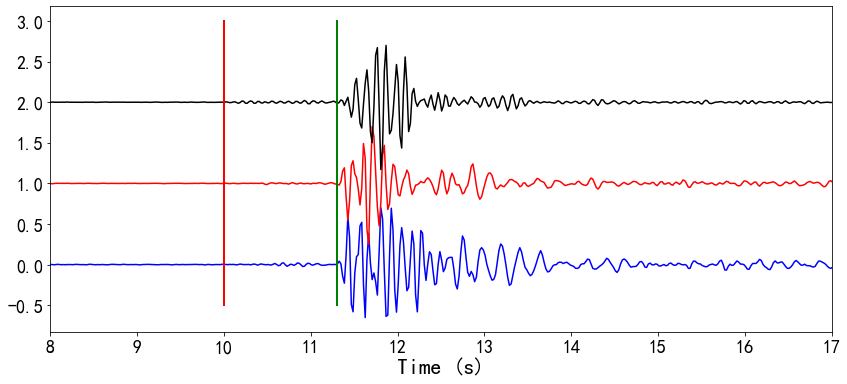

In [4]:
plot1D(wav,tp,ts);
plt.xlim([8,17]);